In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as pyoffline
import plotly.figure_factory as ff
pyoffline.init_notebook_mode(connected=True)

from scipy.cluster.hierarchy import linkage, dendrogram


print(__version__)

3.1.0


In [171]:
train=pd.read_csv("loan_train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Replacing the null value with most repreated value in the column

In [172]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [173]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Basic analysis

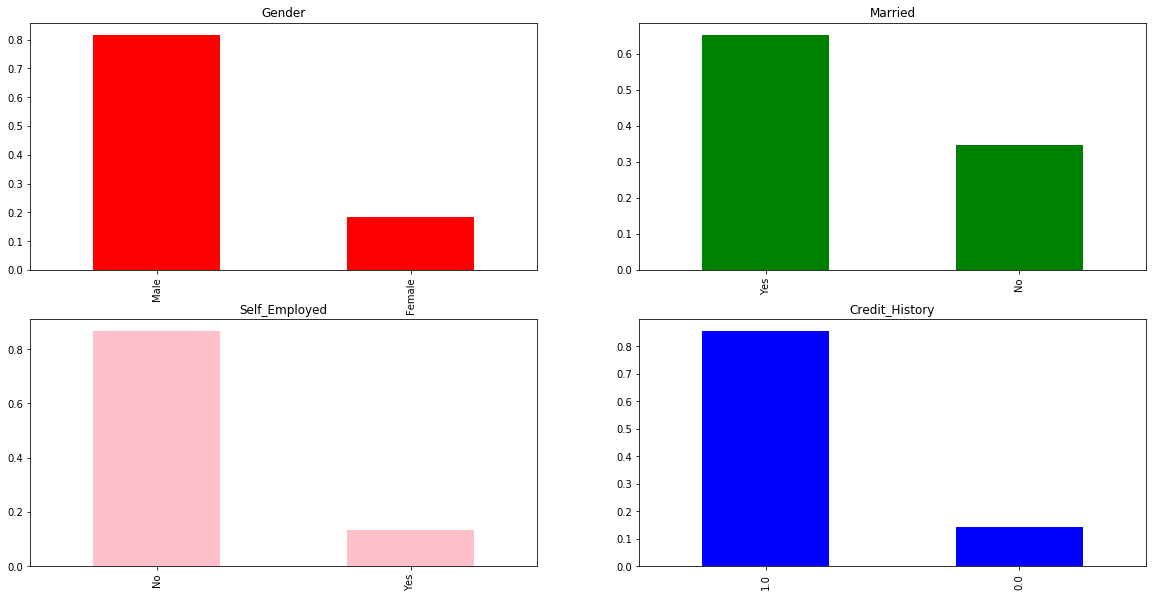

In [174]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color="pink")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color="blue")



plt.show()

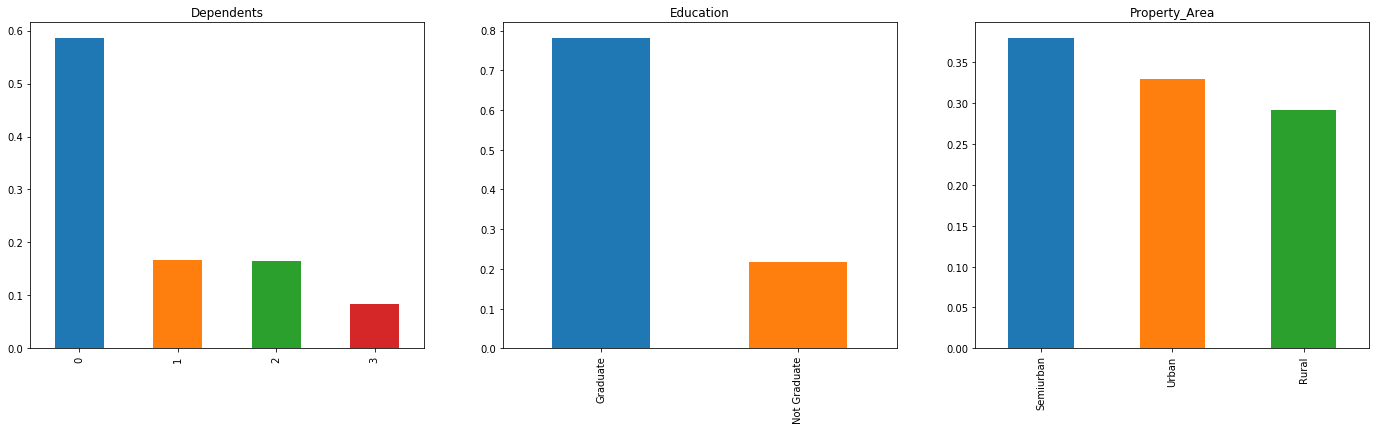

In [175]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

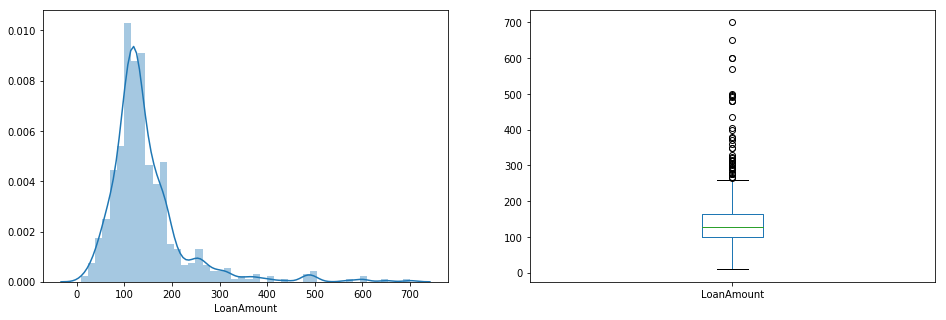

In [176]:
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna());
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

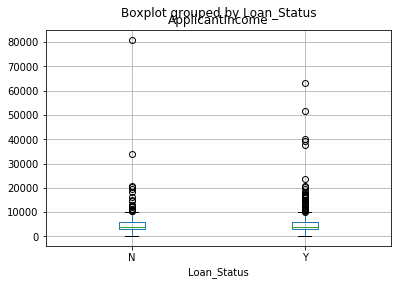

In [177]:
train.boxplot(column="ApplicantIncome",by="Loan_Status")

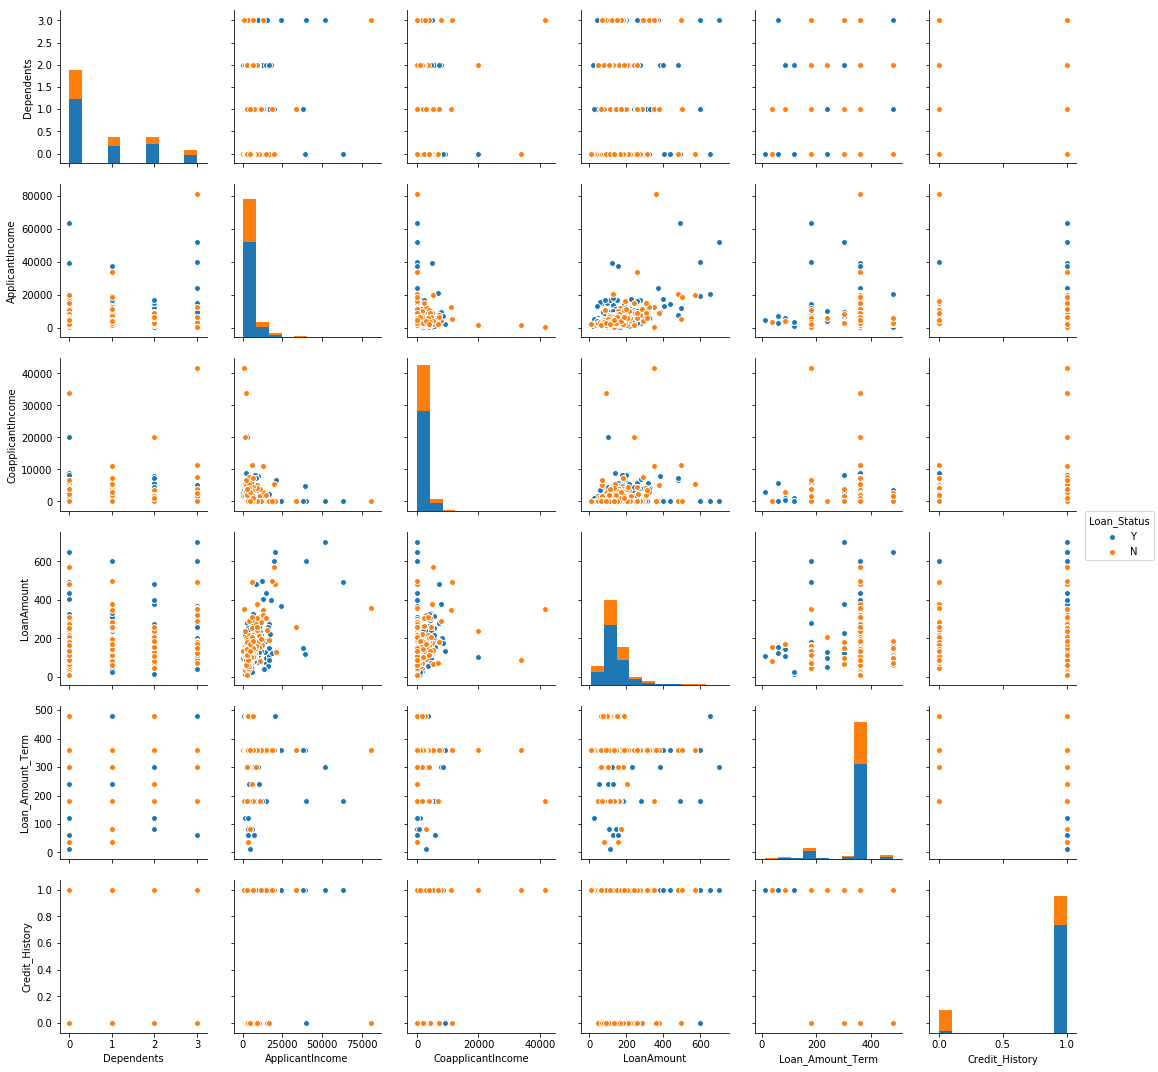

In [178]:
sns_df=train.dropna()
sns.pairplot(sns_df,hue="Loan_Status",size=2.5)

In [179]:
grps = train.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
grps

LoanAmount
Gender Married Self_Employed            
Female No      No             114.666667
               Yes            128.681818
       Yes     No             134.071429
               Yes            282.250000
Male   No      No             129.793103
               Yes            180.588235
       Yes     No             152.717868
               Yes            168.920000

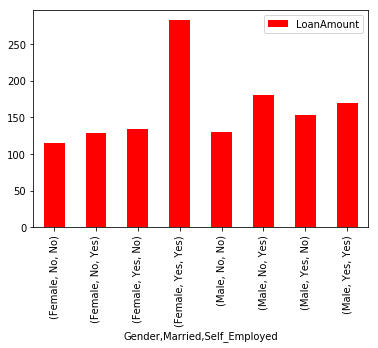

In [180]:
grps.plot(kind = 'bar',color="red")

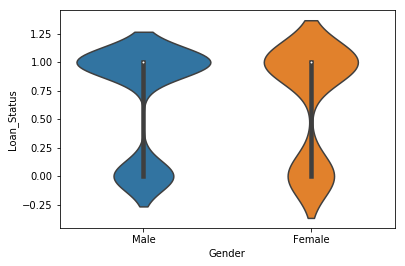

In [181]:
sns_df['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)
sns.violinplot("Gender","Loan_Status",data=sns_df,plalette=["lightblue","lightpink"]);

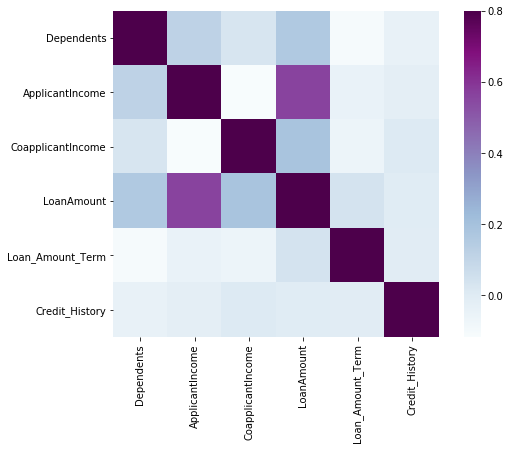

In [182]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

## Label Encoder
To convert all non numeric value into numeric value

In [183]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['Gender']=number.fit_transform(train['Gender'].astype('str'))
train['Married']=number.fit_transform(train['Married'].astype('str'))
train['Education']=number.fit_transform(train['Education'].astype('str'))
train['Self_Employed']=number.fit_transform(train['Self_Employed'].astype('str'))
train['Property_Area']=number.fit_transform(train['Property_Area'].astype('str'))
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [184]:
train=train.drop('Loan_ID',axis=1)

In [185]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [186]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


## LogisticRegression

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,1,0,0,0,0,8750,4167.0,308.0,360.0,1.0,0
593,1,1,0,0,0,3859,3300.0,142.0,180.0,1.0,0
320,1,1,0,0,0,2400,2167.0,115.0,360.0,1.0,1
186,1,1,1,0,1,2178,0.0,66.0,300.0,0.0,0
557,1,1,3,0,1,10139,0.0,260.0,360.0,1.0,1


In [189]:
model = LogisticRegression(random_state=1)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Accuracy

In [190]:
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print('accuracy_score',score)

accuracy_score 0.8324324324324325


## Coefficient of the features

In [191]:
model.coef_

array([[-8.58761890e-02,  4.14853050e-01,  7.62876385e-03,
        -4.58254575e-01, -1.88001924e-02,  1.04180413e-06,
        -5.83174176e-05, -1.73261345e-03, -3.57467170e-03,
         2.73655149e+00,  5.84364210e-02]])

In [192]:
d= pd.DataFrame(model.coef_,columns=X_train.columns)
d_1=d.T

In [193]:
d_1.abs().sort_values(by=0, ascending=False)

,0
Credit_History,2.736551
Education,0.458255
Married,0.414853
Gender,0.085876
Property_Area,0.058436
Self_Employed,0.018800
Dependents,0.007629
Loan_Amount_Term,0.003575
LoanAmount,0.001733
CoapplicantIncome,0.000058


## Preprocessing 

Used min_max scaler function to make the value between 0 to 1

## GaussianMixture

Cluster into 2 parts

Featured columns:

* Credit_History

* Education

* Married

* Gender

* Property_Area

* Self_Employed

* Dependents


In [194]:
from sklearn.mixture import GaussianMixture as GMM  
x = train.loc[:,('Credit_History','Education','Married','Gender','Property_Area','Self_Employed','Dependents')].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

train['Credit_History_scaled'] = x_scaled[:,0]
train['Education_scaled'] =x_scaled[:,1]
train['Married_scaled'] =x_scaled[:,2]
train['Gender_scaled'] =x_scaled[:,3]
train['Property_Area_scaled'] = x_scaled[:,4]
train['Self_Employed_scaled'] =x_scaled[:,5]
train['Dependents_scaled'] =x_scaled[:,6]

train['Loan_Status']=number.fit_transform(train['Loan_Status'].astype('str'))

#build feature matrix
X_tb = train.drop(['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','Dependents','Credit_History','LoanAmount'], axis=1)



In [195]:
model = GMM(n_components=2, covariance_type='full') 
model.fit(X_tb)                    
tb_clusters = model.predict(X_tb)  
train['cluster']=tb_clusters
t=train[['Credit_History_scaled','Education_scaled','Married_scaled',
            'Gender_scaled','Property_Area_scaled','Self_Employed_scaled',
            'Dependents_scaled','cluster']]

# t.head()
# sns.pairplot(t,hue="cluster",size=2.5)

Saving the two clusters into seprate dataframe

In [196]:
cluster_1 = t[t['cluster']==0]
cluster_2 = t[t['cluster']==1]
cluster_1.head()


,Credit_History_scaled,Education_scaled,Married_scaled,Gender_scaled,Property_Area_scaled,Self_Employed_scaled,Dependents_scaled,cluster
0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0
13,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0
15,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0
16,1.0,1.0,0.0,1.0,1.0,0.0,0.333333,0


In [197]:
cluster_2.head()

,Credit_History_scaled,Education_scaled,Married_scaled,Gender_scaled,Property_Area_scaled,Self_Employed_scaled,Dependents_scaled,cluster
1,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,1
2,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,1
3,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,1
5,1.0,0.0,1.0,1.0,1.0,1.0,0.666667,1
6,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,1


# Cluster 1 vs Cluster 2



# Gender and married status

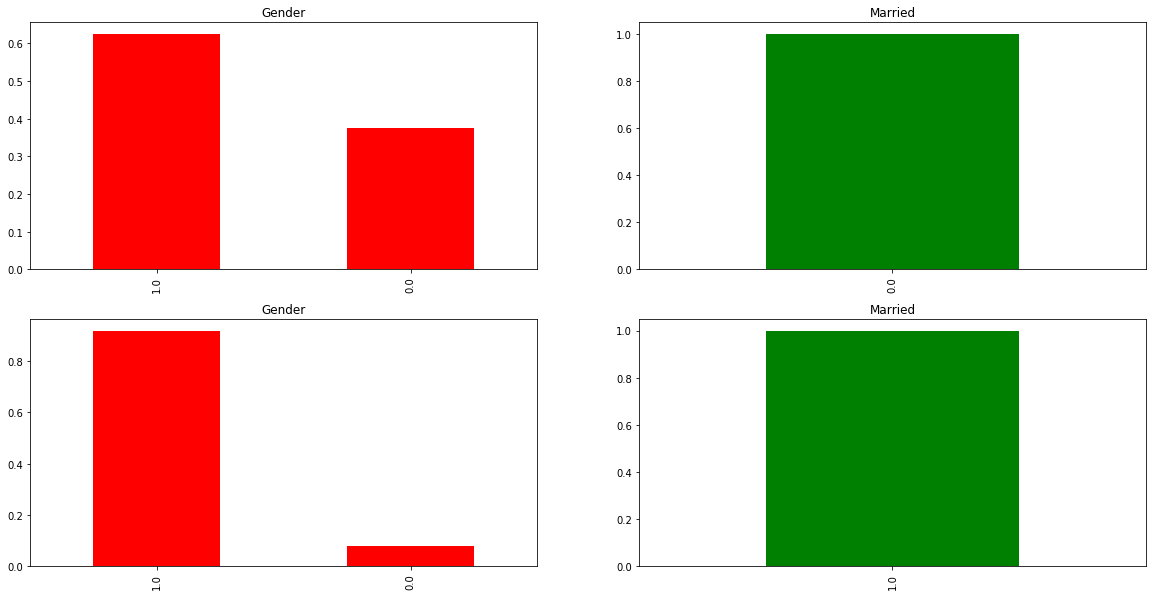

In [198]:
plt.figure(1)
plt.subplot(221)
cluster_1['Gender_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(222)
cluster_1['Married_scaled'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")

plt.subplot(223)
cluster_2['Gender_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(224)
cluster_2['Married_scaled'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")
plt.show()

## Credit History and Property Area

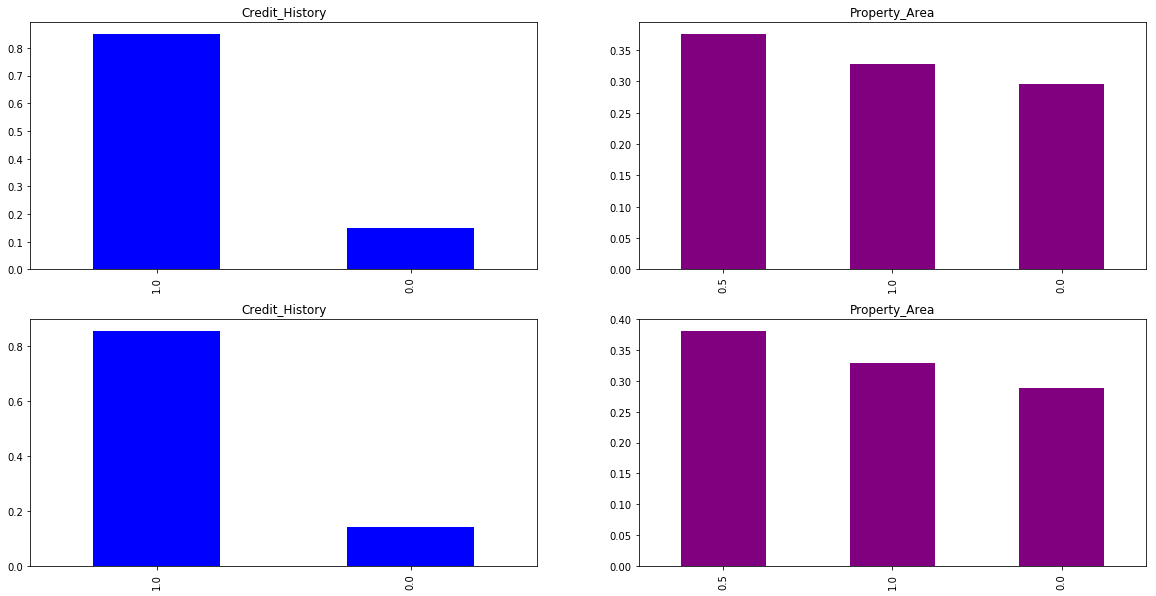

In [199]:
plt.figure(1)
plt.subplot(221)
cluster_1['Credit_History_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History', color="blue")

plt.subplot(222)
cluster_1['Property_Area_scaled'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color="purple")

plt.subplot(223)
cluster_2['Credit_History_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History', color="blue")

plt.subplot(224)
cluster_2['Property_Area_scaled'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color="purple")


plt.show()

## Education and Self_Employed

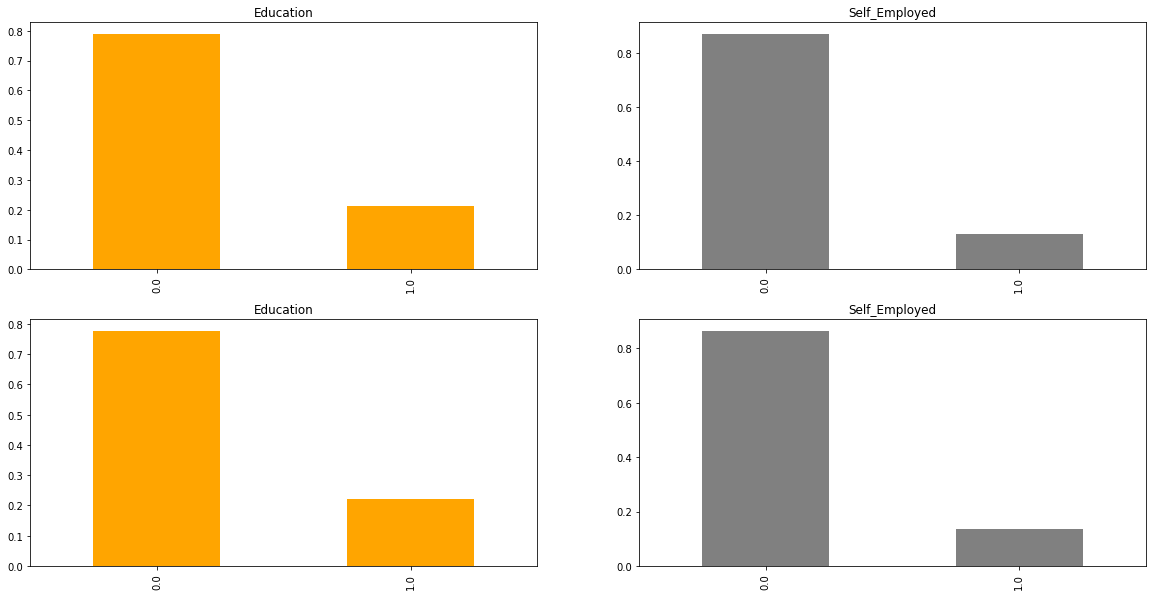

In [200]:
plt.figure(1)
plt.subplot(221)
cluster_1['Education_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Education', color="orange")

plt.subplot(222)
cluster_1['Self_Employed_scaled'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color="grey")

plt.subplot(223)
cluster_2['Education_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Education', color="orange")

plt.subplot(224)
cluster_2['Self_Employed_scaled'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color="grey")


plt.show()

## Dependents

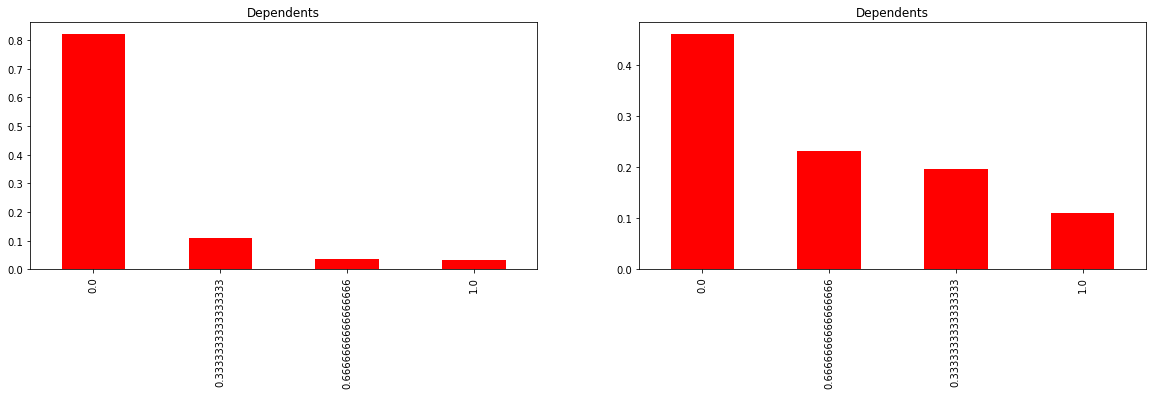

In [201]:
plt.figure(1)
plt.subplot(221)
cluster_1['Dependents_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents', color="red")

plt.subplot(222)
cluster_2['Dependents_scaled'].value_counts(normalize=True).plot.bar(title= 'Dependents',color="red")

plt.show()

### displot and describe on Dependents 

In [202]:
print(cluster_1['Dependents_scaled'].describe())
print(cluster_2['Dependents_scaled'].describe())

count    213.000000
mean       0.093897
std        0.230188
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Dependents_scaled, dtype: float64
count    401.000000
mean       0.330008
std        0.355106
min        0.000000
25%        0.000000
50%        0.333333
75%        0.666667
max        1.000000
Name: Dependents_scaled, dtype: float64


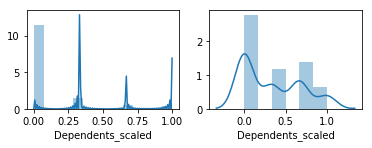

In [203]:

plt.figure(1)
plt.subplot(221)
sns.distplot(cluster_1['Dependents_scaled']);

plt.subplot(222)
sns.distplot(cluster_2['Dependents_scaled']);
plt.show()

### displot and describe on  Education


In [204]:
print(cluster_1['Education_scaled'].describe())
print(cluster_2['Education_scaled'].describe())

count    213.000000
mean       0.211268
std        0.409169
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Education_scaled, dtype: float64
count    401.000000
mean       0.221945
std        0.416074
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Education_scaled, dtype: float64


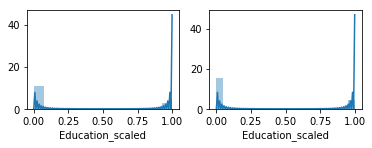

In [205]:

plt.figure(1)
plt.subplot(221)
sns.distplot(cluster_1['Education_scaled']);

plt.subplot(222)
sns.distplot(cluster_2['Education_scaled']);
plt.show()

### displot and describe on  Credit History

In [206]:
print(cluster_1['Credit_History_scaled'].describe())
print(cluster_2['Credit_History_scaled'].describe())

count    213.000000
mean       0.849765
std        0.358143
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History_scaled, dtype: float64
count    401.000000
mean       0.857855
std        0.349635
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History_scaled, dtype: float64


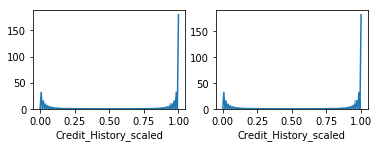

In [207]:

plt.figure(1)
plt.subplot(221)
sns.distplot(cluster_1['Credit_History_scaled']);

plt.subplot(222)
sns.distplot(cluster_2['Credit_History_scaled']);
plt.show()